# Multiple linear regression

In [1]:
setwd('/Users/erinlarson/Dropbox/Documents/GIT/DDESSS_Stream_Dream_Team')
data<-read.csv('WorkingDataSet.csv')
head(data)
library("dplyr")

X,ResultMeasure2,STRAHLER2,DrainageAreaMeasure_MeasureValue,HUCEightDigitCode,date,ResultSampleFractionText,PFOR2,PWETL2,PURB2,PAGT2,LatitudeMeasure,LongitudeMeasure,MonitoringLocationIdentifier
1,0,2.4,195,15060103,2001-02-07T00:00:00Z,Total,73.918,0.01,0.132,0.076,33.57311,-110.9012,USGS-09498400
2,0,2.4,195,15060103,2001-04-19T00:00:00Z,Total,73.918,0.01,0.132,0.076,33.57311,-110.9012,USGS-09498400
3,0,2.4,195,15060103,2001-09-04T00:00:00Z,Total,73.918,0.01,0.132,0.076,33.57311,-110.9012,USGS-09498400
4,0,2.4,195,15060103,2001-12-20T00:00:00Z,Total,73.918,0.01,0.132,0.076,33.57311,-110.9012,USGS-09498400
5,0,2.4,195,15060103,2002-06-11T00:00:00Z,Total,73.918,0.01,0.132,0.076,33.57311,-110.9012,USGS-09498400
6,0,2.4,195,15060103,2002-09-06T00:00:00Z,Total,73.918,0.01,0.132,0.076,33.57311,-110.9012,USGS-09498400



Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [7]:
TotalP<-subset(data, ResultSampleFractionText=="Total" )
Total<-group_by(TotalP, MonitoringLocationIdentifier) %>% 
    summarise(AvgTotal_P = mean(ResultMeasure2, na.rm = TRUE),
              SDTotal_P = sd(ResultMeasure2, na.rm = TRUE),
              PFOR2 = mean(PFOR2, na.rm = TRUE),
              PWETL2 = mean(PWETL2, na.rm = TRUE),
              PURB2 = mean(PURB2, na.rm = TRUE),
              PAGT2 = mean(PAGT2, na.rm = TRUE),
             Lat = mean(LatitudeMeasure, na.rm = TRUE),
              Long = mean(LongitudeMeasure, na.rm=TRUE)
             ) 

TD.P<-subset(data, ResultSampleFractionText=="Dissolved" )
TDP<-group_by(TD.P, MonitoringLocationIdentifier) %>% 
    summarise(AvgTDP = mean(ResultMeasure2, na.rm = TRUE),
              SDTotal_P = sd(ResultMeasure2, na.rm = TRUE),
              PFOR2 = mean(PFOR2, na.rm = TRUE),
              PWETL2 = mean(PWETL2, na.rm = TRUE),
              PURB2 = mean(PURB2, na.rm = TRUE),
              PAGT2 = mean(PAGT2, na.rm = TRUE),
             Lat = mean(LatitudeMeasure, na.rm = TRUE),
              Long = mean(LongitudeMeasure, na.rm=TRUE)
             ) 

do multiple linear regression: fit <- lm(y ~ x1 + x2 + x3, data=mydata)
summary(fit) # show results

In [4]:
total.fit<-lm(AvgTotal_P~ PFOR2+PWETL2+PURB2+PAGT2, data=Total)
summary(total.fit)


Call:
lm(formula = AvgTotal_P ~ PFOR2 + PWETL2 + PURB2 + PAGT2, data = Total)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.09006 -0.03863 -0.01798  0.01051  0.49208 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept)  0.0046954  0.0199328   0.236  0.81432   
PFOR2        0.0010261  0.0003023   3.394  0.00104 **
PWETL2       0.0120970  0.0224336   0.539  0.59109   
PURB2        0.0993208  0.0986228   1.007  0.31666   
PAGT2       -0.0207222  0.0169024  -1.226  0.22347   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.07873 on 88 degrees of freedom
Multiple R-squared:  0.1241,	Adjusted R-squared:  0.08429 
F-statistic: 3.117 on 4 and 88 DF,  p-value: 0.01897


In [5]:
step(total.fit)

Start:  AIC=-467.89
AvgTotal_P ~ PFOR2 + PWETL2 + PURB2 + PAGT2

         Df Sum of Sq     RSS     AIC
- PWETL2  1  0.001802 0.54730 -469.59
- PURB2   1  0.006287 0.55179 -468.83
- PAGT2   1  0.009317 0.55482 -468.32
<none>                0.54550 -467.89
- PFOR2   1  0.071400 0.61690 -458.46

Step:  AIC=-469.59
AvgTotal_P ~ PFOR2 + PURB2 + PAGT2

        Df Sum of Sq     RSS     AIC
- PURB2  1  0.005922 0.55322 -470.59
- PAGT2  1  0.007558 0.55486 -470.31
<none>               0.54730 -469.59
- PFOR2  1  0.070181 0.61748 -460.37

Step:  AIC=-470.59
AvgTotal_P ~ PFOR2 + PAGT2

        Df Sum of Sq     RSS     AIC
- PAGT2  1  0.007026 0.56025 -471.41
<none>               0.55322 -470.59
- PFOR2  1  0.067853 0.62108 -461.83

Step:  AIC=-471.41
AvgTotal_P ~ PFOR2

        Df Sum of Sq     RSS     AIC
<none>               0.56025 -471.41
- PFOR2  1  0.062542 0.62279 -463.57



Call:
lm(formula = AvgTotal_P ~ PFOR2, data = Total)

Coefficients:
(Intercept)        PFOR2  
   0.006847     0.000916  


In [6]:
total.fit<-lm(AvgTotal_P~ PFOR2, data=Total)
summary(total.fit)


Call:
lm(formula = AvgTotal_P ~ PFOR2, data = Total)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.08199 -0.04006 -0.02013  0.01135  0.49786 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)   
(Intercept) 0.0068474  0.0192576   0.356  0.72299   
PFOR2       0.0009160  0.0002874   3.187  0.00197 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.07846 on 91 degrees of freedom
Multiple R-squared:  0.1004,	Adjusted R-squared:  0.09054 
F-statistic: 10.16 on 1 and 91 DF,  p-value: 0.001969


In [8]:
TDP.fit<-lm(AvgTDP~ PFOR2+PWETL2+PURB2+PAGT2, data=TDP)
summary(TDP.fit)


Call:
lm(formula = AvgTDP ~ PFOR2 + PWETL2 + PURB2 + PAGT2, data = TDP)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.06801 -0.02759 -0.01672  0.00049  0.81731 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)
(Intercept)  0.0117377  0.0384549   0.305    0.761
PFOR2        0.0005688  0.0006502   0.875    0.385
PWETL2      -0.0293902  0.5027871  -0.058    0.954
PURB2        0.0132395  0.1921974   0.069    0.945
PAGT2       -0.0314932  0.0324699  -0.970    0.336

Residual standard error: 0.1153 on 55 degrees of freedom
Multiple R-squared:  0.02302,	Adjusted R-squared:  -0.04803 
F-statistic: 0.324 on 4 and 55 DF,  p-value: 0.8607


In [9]:
step(TDP.fit)

Start:  AIC=-254.47
AvgTDP ~ PFOR2 + PWETL2 + PURB2 + PAGT2

         Df Sum of Sq     RSS     AIC
- PWETL2  1 0.0000454 0.73097 -256.46
- PURB2   1 0.0000631 0.73099 -256.46
- PFOR2   1 0.0101703 0.74109 -255.64
- PAGT2   1 0.0125020 0.74342 -255.45
<none>                0.73092 -254.47

Step:  AIC=-256.46
AvgTDP ~ PFOR2 + PURB2 + PAGT2

        Df Sum of Sq     RSS     AIC
- PURB2  1 0.0000473 0.73102 -258.46
- PFOR2  1 0.0103371 0.74130 -257.62
- PAGT2  1 0.0124682 0.74344 -257.45
<none>               0.73097 -256.46

Step:  AIC=-258.46
AvgTDP ~ PFOR2 + PAGT2

        Df Sum of Sq     RSS     AIC
- PFOR2  1  0.010310 0.74133 -259.62
- PAGT2  1  0.012552 0.74357 -259.44
<none>               0.73102 -258.46

Step:  AIC=-259.62
AvgTDP ~ PAGT2

        Df Sum of Sq     RSS     AIC
- PAGT2  1 0.0068203 0.74815 -261.07
<none>               0.74133 -259.62

Step:  AIC=-261.07
AvgTDP ~ 1




Call:
lm(formula = AvgTDP ~ 1, data = TDP)

Coefficients:
(Intercept)  
    0.03239  


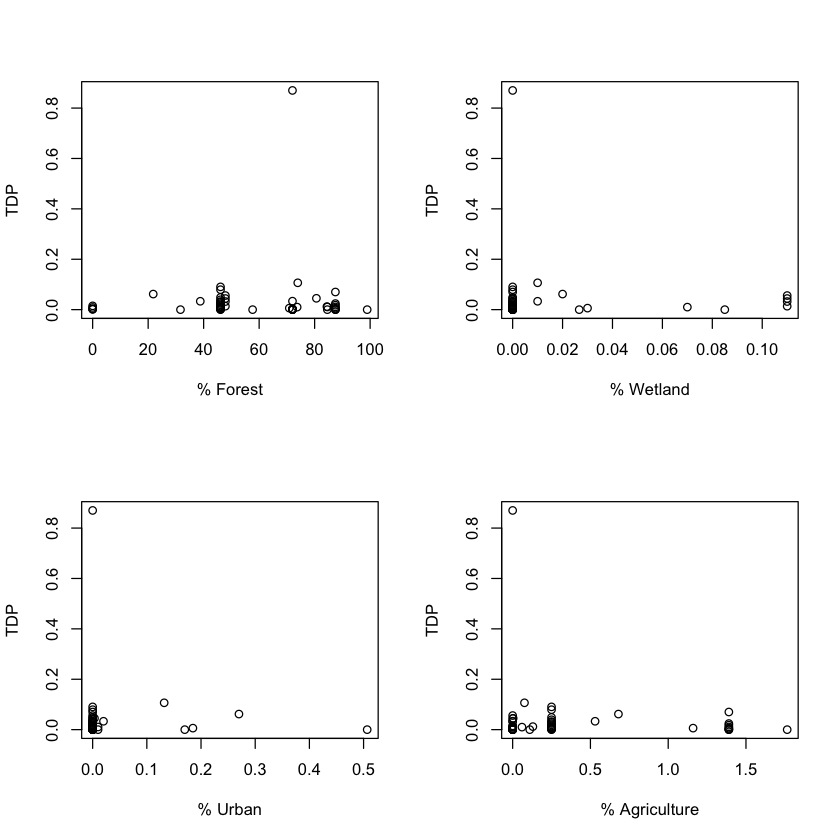

In [10]:

par(mfrow=c(2,2))
plot(TDP$PFOR2, TDP$AvgTDP, ylab="TDP", xlab="% Forest")
plot(TDP$PWETL2, TDP$AvgTDP, ylab="TDP", xlab="% Wetland")
plot(TDP$PURB2, TDP$AvgTDP, ylab="TDP", xlab="% Urban")
plot(TDP$PAGT2, TDP$AvgTDP, ylab="TDP", xlab="% Agriculture")



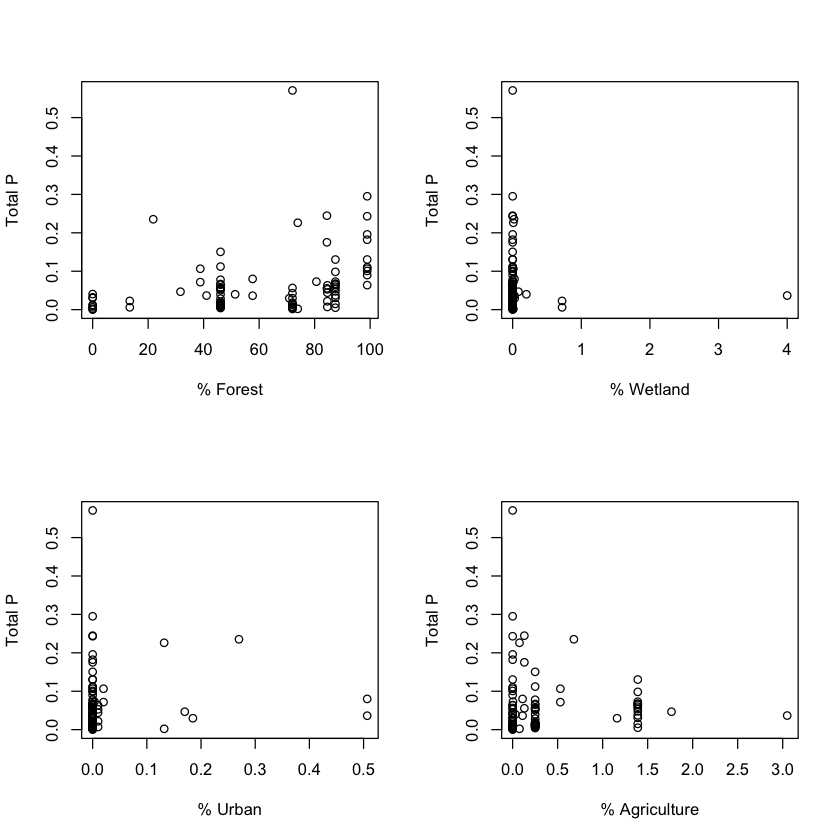

In [11]:
par(mfrow=c(2,2))
plot(Total$PFOR2, Total$AvgTotal_P, ylab="Total P", xlab="% Forest")
plot(Total$PWETL2, Total$AvgTotal_P, ylab="Total P", xlab="% Wetland")
plot(Total$PURB2, Total$AvgTotal_P, ylab="Total P", xlab="% Urban")
plot(Total$PAGT2, Total$AvgTotal_P, ylab="Total P", xlab="% Agriculture")
